put the soplution on number 2 for x^2

In [1]:
#We import the necessary libraries to organize data and plot the Premier League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open(r"C:\Users\leona\Desktop\ADMHMK2\matches_Italy.json", 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)

In [3]:
with open(r"C:\Users\leona\Desktop\ADMHMK2\teams.json", 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)

In [4]:
with open(r"C:\Users\leona\Desktop\ADMHMK2\players.json", 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)

## Exploratory Data Analysis
All the analysis from RQ1 to RQ5, are performed only over the Serie A dataset.

## [RQ1] Who wants to be a Champion?

Create a plot where each point (x,y) represents the number of points obtained by team x at game week y

For this task, we need the dataframes matches and teams. In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the Serie A season 2017/2018.

We load the 'matches_Italy' and 'teams' json files and produce the pandas dataframe

In [5]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


In [6]:
teams.area[18]

{'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'}

Now we will produce a new dataframe with only italian teams with the tag{'name':'Italy'}

In [7]:
italian = teams[teams['area']=={'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'}]
italian = italian.reset_index(drop=True)
italian
#The teams are 20 correctly, we checked on wikipedia to be sure to not be letting anything out

,area,city,name,officialName,type,wyId
0,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Ferrara,SPAL,Societ\u00e0 Polisportiva Ars et Labor 2013,club,3204
1,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Milano,Milan,AC Milan,club,3157
2,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Torino,Juventus,Juventus FC,club,3159
3,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Roma,Roma,AS Roma,club,3158
4,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Sassuolo,Sassuolo,US Sassuolo Calcio,club,3315
5,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Bologna,Bologna,Bologna FC 1909,club,3166
6,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Genova,Sampdoria,UC Sampdoria,club,3164
7,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Verona,Chievo,AC Chievo Verona,club,3165
8,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Formello,Lazio,SS Lazio,club,3162
9,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Udine,Udinese,Udinese Calcio,club,3163


Now we create a dataframe with only the name and the wyId of the teams, to be easy accessible later.

In [8]:
Italteam = pd.DataFrame(italian['name'])
Italteam['code'] = italian['wyId']
Italteam = Italteam.sort_values('code')
Italteam = Italteam.reset_index(drop = True)
Italteam
Italater=Italteam.copy()

From the dataframe matches we need only the 'gameweek' and 'winner' columns so we create a SerieA Dataframe.

In [9]:
SerieA = pd.DataFrame(matches['gameweek'])
SerieA['winner'] = matches['winner']
SerieA['result'] = matches['label']
SerieA = SerieA.sort_values('gameweek')
SerieA = SerieA.reset_index(drop=True)
SerieA[:7]

,gameweek,winner,result
0,1,3159,"Juventus - Cagliari, 3 - 0"
1,1,3158,"Atalanta - Roma, 0 - 1"
2,1,3165,"Udinese - Chievo, 1 - 2"
3,1,0,"Sassuolo - Genoa, 0 - 0"
4,1,3164,"Sampdoria - Benevento, 2 - 1"
5,1,0,"Lazio - SPAL, 0 - 0"
6,1,3161,"Internazionale - Fiorentina, 3 - 0"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

**Creating the ranking with all the points of each team during the 38 weeks of the season.**

There are 20 teams so in total there will be 38 weeks, so we add 38 week comulns to the Italteam dataframe.

In [10]:
for i in range(1,39):
    Italteam['week {}'.format(i)]=0
Italteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Milan,3157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roma,3158,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Juventus,3159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Internazionale,3161,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lazio,3162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Creating copy dataframes to avoid damaging the original ones
I = Italteam.copy()
S = SerieA.copy()

Now we put the results in the I dataframe.

In [12]:
#As every week there are 10 matches we have 380 nmatches in a season
for i in range(380):
    if S['winner'][i] != 0: #no draw
        I.loc[I['code']==S['winner'][i],['week {}'.format(S['gameweek'][i])]]=3
    else:
        for j in range(20):
            if I['name'][j] in S['result'][i]:
                I.at[j,'week {}'.format(S['gameweek'][i])] = 1
I

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Milan,3157,3,3,0,3,3,0,0,0,...,3,0,1,1,1,0,3,3,1,3
1,Roma,3158,3,0,1,3,3,3,3,0,...,3,1,0,1,3,3,3,3,1,3
2,Juventus,3159,3,3,3,3,3,3,1,0,...,1,3,3,3,1,0,3,3,1,3
3,Internazionale,3161,3,3,3,3,1,3,3,3,...,3,3,0,1,3,3,0,3,0,3
4,Lazio,3162,1,3,3,3,0,3,3,3,...,1,3,3,1,3,3,3,1,1,0
5,Udinese,3163,0,0,3,0,0,0,3,0,...,0,0,0,0,0,0,1,0,3,3
6,Sampdoria,3164,3,3,1,1,1,3,0,3,...,0,0,1,0,3,0,3,0,0,0
7,Chievo,3165,3,0,0,1,1,3,3,1,...,0,3,0,1,1,0,0,3,3,3
8,Bologna,3166,1,3,0,0,1,3,3,3,...,1,1,0,3,0,1,0,0,0,0
9,Atalanta,3172,0,0,3,1,3,1,1,0,...,3,3,1,1,3,3,3,1,1,0


**Let's create the plot!**

In [13]:
#we remove name and code because now we don't need them anymore
I = I.loc[:,'week 1':]

Now we list the results of each team and then sum them to create the plot week by week

In [14]:
Graf = I.values.tolist()
Grafv = list(Graf)

In [15]:
for i in range(20):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j]
#Create a list with the summed value week by week
Grafv[0]

[3,
 6,
 6,
 9,
 12,
 12,
 12,
 12,
 13,
 16,
 16,
 19,
 19,
 20,
 21,
 24,
 24,
 24,
 25,
 28,
 31,
 34,
 35,
 38,
 41,
 44,
 45,
 48,
 51,
 51,
 52,
 53,
 54,
 54,
 57,
 60,
 61,
 64]

In [16]:
wg = []
for i in range(1,39):
    wg.append('{}'.format(i)) # x ticks of every week

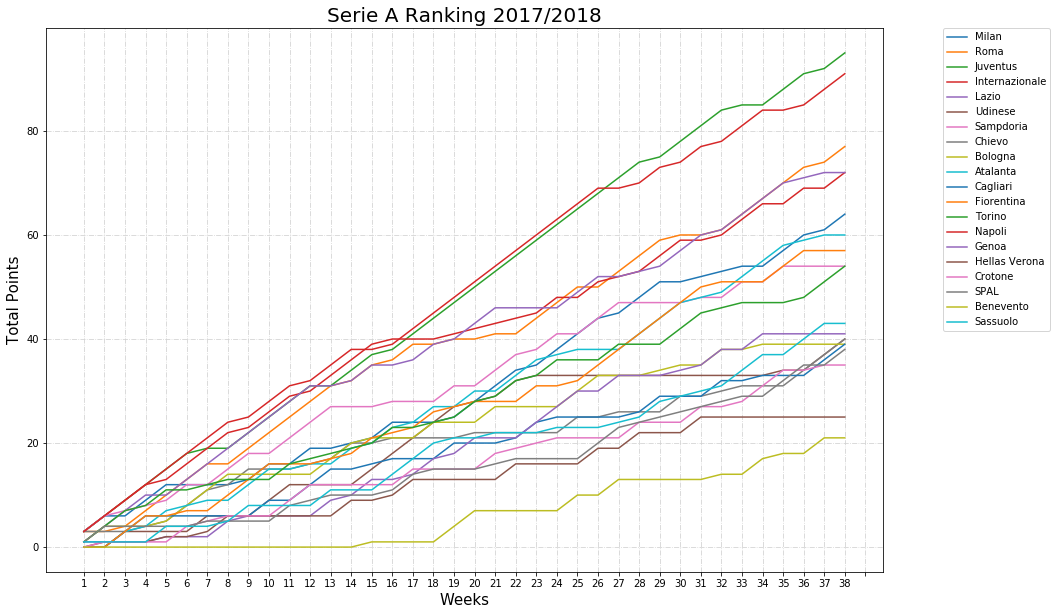

In [17]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.plot(Grafv[i], label = Italteam['name'][i])
    
plt.xticks(range(0,39),wg, size = 10)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('Serie A Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

**Now let's see the worst 2 teams(worst loss streaks!) and 2 best ones(best win streaks!).**

In [18]:
def bestornot(n):
    r = I.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r

In [19]:
bestornot(3)#most consecutive wins for team in the season

['333',
 '33333',
 '333333333333',
 '3333',
 '3333333',
 '33333',
 '333',
 '333',
 '333',
 '333',
 '33',
 '333333',
 '33',
 '3333333333',
 '333',
 '3',
 '33',
 '33',
 '33',
 '333']

In [20]:
Italteam.at[2, 'name'] #best team

'Juventus'

In [21]:
Italteam.at[13, 'name'] #2nd best

'Napoli'

In [22]:
bestornot(0)

['000',
 '0',
 '0',
 '00',
 '000',
 '00000000000',
 '000',
 '0000',
 '0000',
 '00',
 '00000',
 '00',
 '00',
 '0',
 '0000',
 '0000000',
 '0000',
 '0000',
 '00000000000000',
 '000']

In [23]:
Italteam.at[18,'name'] #worstlossstreak!

'Benevento'

In [24]:
Italteam.at[5 ,'name']#secondworstlossstreak!

'Udinese'

## [RQ2] Is there a home-field advantage?

I am interested in labels in the matches dataframe.

In [25]:
matches.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [26]:
workingData = matches['label']
workingData.head()

0    Lazio - Internazionale, 2 - 3
1           Sassuolo - Roma, 0 - 1
2       Cagliari - Atalanta, 1 - 0
3        Chievo - Benevento, 1 - 0
4         Udinese - Bologna, 1 - 0
Name: label, dtype: object

In [27]:
wkd = pd.DataFrame(workingData)
wkd.head()

,label
0,"Lazio - Internazionale, 2 - 3"
1,"Sassuolo - Roma, 0 - 1"
2,"Cagliari - Atalanta, 1 - 0"
3,"Chievo - Benevento, 1 - 0"
4,"Udinese - Bologna, 1 - 0"


In [28]:
new = wkd["label"].str.split(",", n = 1, expand = True)
new.head()

,0,1
0,Lazio - Internazionale,2 - 3
1,Sassuolo - Roma,0 - 1
2,Cagliari - Atalanta,1 - 0
3,Chievo - Benevento,1 - 0
4,Udinese - Bologna,1 - 0


In [29]:
new.rename(columns = {0 :'Match',1 :'Result'}, inplace = True)
new.columns

Index(['Match', 'Result'], dtype='object')

In [30]:
Mtc = new["Match"].str.split("-", n = 1, expand = True)
Mtc.head()

,0,1
0,Lazio,Internazionale
1,Sassuolo,Roma
2,Cagliari,Atalanta
3,Chievo,Benevento
4,Udinese,Bologna


In [31]:
Rst = new["Result"].str.split("-", n = 1, expand = True)
Rst.head()

,0,1
0,2,3
1,0,1
2,1,0
3,1,0
4,1,0


In [32]:
alldata = pd.DataFrame({'Home':Mtc[0], 'ResH':Rst[0], 'ResNH':Rst[1],'Nhome':Mtc[1]})
alldata.head()

,Home,ResH,ResNH,Nhome
0,Lazio,2,3,Internazionale
1,Sassuolo,0,1,Roma
2,Cagliari,1,0,Atalanta
3,Chievo,1,0,Benevento
4,Udinese,1,0,Bologna


In [33]:
l = [] #I want the name of the winner of every match or 'Draw'
for i in range(len(alldata)):
    a = int(alldata.loc[i,'ResH'])
    b = int(alldata.loc[i,'ResNH'])
    #print(a,b)
    if a==b:
       # print('1')
        l.append('Draw')
    elif a>b:
        l.append(alldata.loc[i,'Home'])
       #print('2')
    elif a<b:
        l.append(alldata.loc[i,'Nhome'])
       # print('3')
    
l

[' Internazionale',
 ' Roma',
 'Cagliari ',
 'Chievo ',
 'Udinese ',
 'Napoli ',
 'Milan ',
 'SPAL ',
 ' Torino',
 'Juventus ',
 'Draw',
 ' Napoli',
 'Draw',
 ' Cagliari',
 ' Chievo',
 'Draw',
 'Torino ',
 ' Udinese',
 ' Sassuolo',
 'Benevento ',
 ' Roma',
 'Sassuolo ',
 'Draw',
 'SPAL ',
 'Chievo ',
 ' Fiorentina',
 'Draw',
 ' Internazionale',
 'Juventus ',
 'Milan ',
 ' Lazio',
 'Fiorentina ',
 'Sampdoria ',
 'Atalanta ',
 ' Milan',
 ' SPAL',
 'Draw',
 'Crotone ',
 ' Juventus',
 'Roma ',
 'Genoa ',
 ' Napoli',
 ' Crotone',
 ' Internazionale',
 'Lazio ',
 'Atalanta ',
 'Draw',
 ' Benevento',
 'Sassuolo ',
 ' Roma',
 'Sampdoria ',
 'Draw',
 'Roma ',
 'Draw',
 ' Lazio',
 'Draw',
 ' Sassuolo',
 'Napoli ',
 ' Atalanta',
 'Internazionale ',
 'Draw',
 'Juventus ',
 'Draw',
 'Bologna ',
 'Draw',
 'Draw',
 'Draw',
 'Genoa ',
 'Draw',
 'Cagliari ',
 'Draw',
 ' Lazio',
 'Crotone ',
 'Hellas Verona ',
 'Napoli ',
 'Torino ',
 'Draw',
 'Draw',
 ' Fiorentina',
 ' Juventus',
 'Torino ',
 'Draw',
 '

In [34]:
alldata['Winner']=l
alldata = alldata.reset_index(drop=True)

In [35]:
allteams = pd.DataFrame(Italteam['name'])
allteams

,name
0,Milan
1,Roma
2,Juventus
3,Internazionale
4,Lazio
5,Udinese
6,Sampdoria
7,Chievo
8,Bologna
9,Atalanta


We have to perform the test so we'll select 5 random teams.

In [36]:
import random
selected_teams = random.sample(range(19),5)
selected_teams

[6, 14, 3, 4, 5]

In [37]:
B = []
for i in selected_teams:
    B.append(str(allteams.loc[i,'name']))
B

['Sampdoria', 'Genoa', 'Internazionale', 'Lazio', 'Udinese']

## For 5 different teams of Premier League, show the contingency table (outcome x side).

We now illustrate the procedure to create a contingency table for team1 ($B[0]$) and later we will do it all in a cell and create the tables for all five teams.

In [38]:
home = alldata[alldata['Home'].str.contains(B[0])]
home

,Home,ResH,ResNH,Nhome,Winner
11,Sampdoria,0,2,Napoli,Napoli
32,Sampdoria,4,1,Cagliari,Sampdoria
50,Sampdoria,1,0,Bologna,Sampdoria
76,Sampdoria,0,0,Genoa,Draw
104,Sampdoria,0,5,Internazionale,Internazionale
126,Sampdoria,2,1,Udinese,Sampdoria
143,Sampdoria,2,0,Hellas Verona,Sampdoria
159,Sampdoria,1,1,Torino,Draw
170,Sampdoria,1,1,Roma,Draw
178,Sampdoria,3,1,Fiorentina,Sampdoria


In [39]:
not_home = alldata[alldata['Nhome'].str.contains(B[0])]
alldata[alldata['Nhome'].str.contains(B[0])]

,Home,ResH,ResNH,Nhome,Winner
7,SPAL,3,1,Sampdoria,SPAL
21,Sassuolo,1,0,Sampdoria,Sassuolo
44,Lazio,4,0,Sampdoria,Lazio
61,Juventus,3,0,Sampdoria,Juventus
86,Atalanta,1,2,Sampdoria,Sampdoria
89,Chievo,2,1,Sampdoria,Chievo
112,Crotone,4,1,Sampdoria,Crotone
131,Milan,1,0,Sampdoria,Milan
160,Roma,0,1,Sampdoria,Sampdoria
187,Benevento,3,2,Sampdoria,Benevento


In [40]:
home['Winner'].str.replace(" ","")
not_home['Winner'].str.replace(" ","")
home

,Home,ResH,ResNH,Nhome,Winner
11,Sampdoria,0,2,Napoli,Napoli
32,Sampdoria,4,1,Cagliari,Sampdoria
50,Sampdoria,1,0,Bologna,Sampdoria
76,Sampdoria,0,0,Genoa,Draw
104,Sampdoria,0,5,Internazionale,Internazionale
126,Sampdoria,2,1,Udinese,Sampdoria
143,Sampdoria,2,0,Hellas Verona,Sampdoria
159,Sampdoria,1,1,Torino,Draw
170,Sampdoria,1,1,Roma,Draw
178,Sampdoria,3,1,Fiorentina,Sampdoria


Now we create 6 values for the number of wins, losses or draws at home or not_home.

In [41]:
Whome = len(home[home['Winner'].str.contains(B[0])])
Dhome = len(home[home['Winner'].str.contains('Draw')])
Lhome = len(home)-Whome-Dhome
Wout = len(not_home[not_home['Winner'].str.contains(B[0])])
Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
Lout = len(not_home)-Wout-Dout
print(Wout,Dout,Lout)

4 3 12


In [42]:
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)

In [43]:
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
raw_data

{'Win': array([12, 4, 16], dtype=object),
 'Loss': array([4, 12, 16], dtype=object),
 'Draw': array([3, 3, 6], dtype=object),
 'Total': array([19, 19, 38], dtype=object)}

In [44]:
Sa = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[0])))
Sa

,Win,Loss,Draw,Total
Sampdoria,,,,
Home,12,4,3,19
Not Home,4,12,3,19
Total,16,16,6,38


Now that's the process to create all five tables that will be in Sa and soon printed below.

In [45]:
Sa = []
for i in range(0,5):
    home = alldata[alldata['Home'].str.contains(B[i])]
    not_home = alldata[alldata['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    Whome = len(home[home['Winner'].str.contains(B[i])])
#Whome
    Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
    Lhome = len(home)-Whome-Dhome
    Wout = len(not_home[not_home['Winner'].str.contains(B[i])])
#Whome
    Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
    Lout = len(not_home)-Wout-Dout
    W = np.array([Whome,Wout, Whome + Wout],dtype = object)
    L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
    D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
    T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
    raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
    Sa.append(pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[i]))))

In [46]:
Sa[0]

,Win,Loss,Draw,Total
Sampdoria,,,,
Home,12,4,3,19
Not Home,4,12,3,19
Total,16,16,6,38


In [47]:
Sa[1]

,Win,Loss,Draw,Total
Genoa,,,,
Home,6,10,3,19
Not Home,5,9,5,19
Total,11,19,8,38


In [48]:
Sa[2]

,Win,Loss,Draw,Total
Internazionale,,,,
Home,11,3,5,19
Not Home,9,3,7,19
Total,20,6,12,38


In [49]:
Sa[3]

,Win,Loss,Draw,Total
Lazio,,,,
Home,9,5,5,19
Not Home,12,3,4,19
Total,21,8,9,38


In [50]:
Sa[4]

,Win,Loss,Draw,Total
Udinese,,,,
Home,6,11,2,19
Not Home,6,11,2,19
Total,12,22,4,38


## Second part-X^2 test

We start saving the results of everyone of the 5 teams without intersections with each other, then create a unique contingency table with the summed values

In [51]:
print(B)

['Sampdoria', 'Genoa', 'Internazionale', 'Lazio', 'Udinese']


Now we save 5 datasets without intersections between the teams and from whioch we'll later count the result to come up with a unique contingency table.

In [52]:
alldata.head()

,Home,ResH,ResNH,Nhome,Winner
0,Lazio,2,3,Internazionale,Internazionale
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
4,Udinese,1,0,Bologna,Udinese


In [53]:
alldata1 = alldata[~alldata['Home'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[4])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[4])]
alldata1
#the dataset from which we take the results of team 1

,Home,ResH,ResNH,Nhome,Winner
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
5,Napoli,2,1,Crotone,Napoli
6,Milan,5,1,Fiorentina,Milan
7,SPAL,3,1,Sampdoria,SPAL
9,Juventus,2,1,Hellas Verona,Juventus
10,Roma,0,0,Juventus,Draw
11,Sampdoria,0,2,Napoli,Napoli
12,Atalanta,1,1,Milan,Draw


In [54]:
alldata2 = alldata[~alldata['Home'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[4])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[4])]
alldata2.head()
#the dataset from which we take the results of team 2

,Home,ResH,ResNH,Nhome,Winner
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
5,Napoli,2,1,Crotone,Napoli
6,Milan,5,1,Fiorentina,Milan


In [55]:
alldata3 = alldata[~alldata['Home'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[4])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[4])]
alldata3.head()
#the dataset from which we take the results of team 3

,Home,ResH,ResNH,Nhome,Winner
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
5,Napoli,2,1,Crotone,Napoli
6,Milan,5,1,Fiorentina,Milan


In [56]:
alldata4 = alldata[~alldata['Home'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[4])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[4])]
alldata4.head()
#the dataset from which we take the results of team 4 B[3]

,Home,ResH,ResNH,Nhome,Winner
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
5,Napoli,2,1,Crotone,Napoli
6,Milan,5,1,Fiorentina,Milan


In [57]:
alldata5 = alldata[~alldata['Home'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[3])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[3])]
alldata5.head()
#the dataset from which we take the results of team 5

,Home,ResH,ResNH,Nhome,Winner
1,Sassuolo,0,1,Roma,Roma
2,Cagliari,1,0,Atalanta,Cagliari
3,Chievo,1,0,Benevento,Chievo
4,Udinese,1,0,Bologna,Udinese
5,Napoli,2,1,Crotone,Napoli


In [58]:
vec = {B[0]:alldata1, B[1] :alldata2, B[2]: alldata3, B[3]:alldata4,B[4]: alldata5}

Here we go with the same process as before to create a contingency table with now the sums of every same cell for every team.

In [59]:
Whome=0
Dhome=0
Lhome=0
Wout=0
Dout=0
Lout=0
for i in range(len(B)):
    home = vec[B[i]][vec[B[i]]['Home'].str.contains(B[i])]
    not_home = vec[B[i]][vec[B[i]]['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    WH1=len(home[home['Winner'].str.contains(B[i])])
    DH1=len(home[home['Winner'].str.contains('Draw')])
    Whome = Whome +WH1
    Dhome =Dhome + DH1
    Lhome = Lhome +len(home)-WH1-DH1
    WO=len(not_home[not_home['Winner'].str.contains(B[i])])
    DO=len(not_home[not_home['Winner'].str.contains('Draw')])
    Wout = Wout + WO
    Dout =Dout + DO
    Lout = Lout +len(not_home)-WO-DO
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
CTtotal = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = 'The five Teams'))
CTtotal

,Win,Loss,Draw,Total
The five Teams,,,,
Home,36,23,16,75
Not Home,26,30,19,75
Total,62,53,35,150


In [60]:
#To be clear the Teams were 
print(B)

['Sampdoria', 'Genoa', 'Internazionale', 'Lazio', 'Udinese']


In [61]:
CT = CTtotal.drop(columns = ['Total'])
CT = CT.drop('Total')
CT

,Win,Loss,Draw
The five Teams,,,
Home,36,23,16
Not Home,26,30,19


In the hypotesis, as the fubnction below does, we **assume independence** between place and result, Let's check if we can accept it!

In [62]:
from scipy.stats import chi2_contingency
#Assumption of independence
chi2, p, dof, expec = chi2_contingency(CT)

In [63]:
chi2

2.794574384836101

In [64]:
p

0.24726684226975582

In [65]:
dof

2

In [66]:
expec

array([[31. , 26.5, 17.5],
       [31. , 26.5, 17.5]])

HERE PUT THE SOLUTIONNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

## [RQ3] Which teams have the youngest coaches?

Let's start analyzing the coaches database, we'll see that we can find the info about every birthDate and an Id(wyId).

In [67]:
with open(r'C:\Users\leona\Desktop\ADMHMK2\coaches.json', 'r') as myfile:
    data = myfile.read()
obj = json.loads(data)
coaches = pd.DataFrame(obj)
coaches.head()

,birthArea,birthDate,currentTeamId,firstName,lastName,middleName,passportArea,shortName,wyId
0,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",None,0,César Domingo,Mendiondo López,,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",Cesar Domingo,275580
1,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1945-05-09,0,Josef,Heynckes,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",J. Heynckes,14710
2,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1956-06-16,0,Giovanni,De Biasi,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",G. De Biasi,135480
3,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1965-08-14,674,Marcelino,García Toral,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Marcelino,210074
4,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1974-04-02,0,Tayfun,Korkut,,"{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",T. Korkut,293398


In [68]:
data1 = pd.concat([coaches['birthDate'],coaches['shortName'], coaches['wyId']], axis = 1)
data1.head()

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398


In [69]:
Dickus = pd.Series(data1.shortName.values,index=data1.wyId).to_dict()
Dickus

{275580: 'Cesar Domingo',
 14710: 'J. Heynckes',
 135480: 'G. De Biasi',
 210074: 'Marcelino',
 293398: 'T. Korkut',
 92894: 'Ernesto Valverde',
 3880: 'Unzué',
 17121: 'D. Schuster',
 20454: 'A. Conte',
 86604: 'R. Gareca',
 259751: 'M. Gisdol',
 142913: 'G. Rohr',
 15114: 'D. Hecking',
 21061: 'V. Montella',
 20603: 'G. Iachini',
 14735: 'B. Labbadia',
 210205: 'L. Lagerbäck',
 225952: 'Fran Escribá',
 26812: 'C. Pélissier',
 251025: 'S. Inzaghi',
 25691: 'R. Garcia',
 210152: 'L. Delneri',
 20386: 'M. Allegri',
 18702: 'M. Schmidt',
 295160: 'Pako Ayestarán',
 230918: 'Abelardo',
 116503: 'D. Alonso',
 18987: 'P. Dárdai',
 210700: 'Rafael Benítez',
 18572: 'D. Wagner',
 69952: 'A. Čačić',
 86569: 'Pizzi',
 355598: 'Imanol Alguacil',
 210513: 'P. Garande',
 23551: 'M. Rastelli',
 32573: 'Carlos Carvalhal',
 210902: 'B. Storck',
 15824: 'R. Hasenhüttl',
 4258: 'Paco Jémez',
 9454: 'G. Megson',
 167037: 'Pepe Mel',
 210121: 'M. Giampaolo',
 228386: 'C. Titz',
 112633: 'J. Osorio',
 246

Now we observe that in the matches dataframe, in the column teamsData we can find the coach for every team in every match.

In [70]:
matches.loc[0]['teamsData']

{'3162': {'scoreET': 0,
  'coachId': 251025,
  'side': 'home',
  'teamId': 3162,
  'score': 2,
  'scoreP': 0,
  'hasFormation': 1,
  'formation': {'bench': [{'playerId': 4792,
     'ownGoals': '2',
     'redCards': '93',
     'goals': '0',
     'yellowCards': '0'},
    {'playerId': 20972,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 256479,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 241675,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 260250,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 69417,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 20460,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 101635,
     'ownG

We want to take out the coachId from this table, but being associated with a team-code, i start creating a dataset with Team and code.

In [71]:
Italater

,name,code
0,Milan,3157
1,Roma,3158
2,Juventus,3159
3,Internazionale,3161
4,Lazio,3162
5,Udinese,3163
6,Sampdoria,3164
7,Chievo,3165
8,Bologna,3166
9,Atalanta,3172


In [72]:
ItDic = pd.Series(Italater.name.values,index=Italater.code).to_dict()
ItDic
#to access easily the coach when we find the youngest and the team code.

{3157: 'Milan',
 3158: 'Roma',
 3159: 'Juventus',
 3161: 'Internazionale',
 3162: 'Lazio',
 3163: 'Udinese',
 3164: 'Sampdoria',
 3165: 'Chievo',
 3166: 'Bologna',
 3172: 'Atalanta',
 3173: 'Cagliari',
 3176: 'Fiorentina',
 3185: 'Torino',
 3187: 'Napoli',
 3193: 'Genoa',
 3194: 'Hellas Verona',
 3197: 'Crotone',
 3204: 'SPAL',
 3219: 'Benevento',
 3315: 'Sassuolo'}

Now let's start digging in the coach's id and respective team for the matches.

In [73]:
l=[]
M = []
for key in matches.teamsData:
    for keys in key:
        l.append(key[keys]['coachId'])
for key in matches.teamsData:
    for keys in key:
            M.append(keys)
   # matches['coachId']
#matches['teamsData'][0]['1646']['coachId']
#print(l,M)
data3 = pd.DataFrame({'coachId':l,'Team':M})
data3 =data3.drop_duplicates()
#coaches played more than one match witha  team so there would be many repeted rows that I cancel with drop_duplicates
data3 = data3
data3.head()

,coachId,Team
0,251025,3162
1,101547,3161
2,210119,3158
3,20603,3315
4,251044,3173


In the dataset of matches many times we find some coachId = 0 due of errors maybe in the creation of the dataset. Knowing this and that every row is a match, being the zeros casual, it will be normal to find in 38 games of every team one value different from zero referring to the coach that would not be changed for only one week, so I cancel the rows with the zeros because the right coach will be in some others.

In [74]:
data3 = data3[data3['coachId']!= 0]
data3 = data3.reset_index(drop=True)
data3

,coachId,Team
0,251025,3162
1,101547,3161
2,210119,3158
3,20603,3315
4,251044,3173
5,210116,3172
6,272970,3165
7,83888,3219
8,20481,3166
9,267555,3163


In [75]:
data3.coachId[1]
for columns in data3:
    print(columns)

coachId
Team


In [76]:
Dick = pd.Series(data3.Team.values,index=data3.coachId).to_dict()
Dick1 = {}
for row in range(len(data3)):
    if data3.coachId[row] in Dick1 and Dick1[data3.coachId[row]]!=data3.Team[row]:
        Dick1[data3.coachId[row]].append(data3.Team[row])
    else:
         Dick1[data3.coachId[row]] = [(data3.Team[row])]
Dick1

{251025: ['3162'],
 101547: ['3161'],
 210119: ['3158'],
 20603: ['3315'],
 251044: ['3173'],
 210116: ['3172'],
 272970: ['3165'],
 83888: ['3219'],
 20481: ['3166'],
 267555: ['3163'],
 287082: ['3197'],
 210252: ['3187'],
 20407: ['3157'],
 20665: ['3176'],
 210121: ['3164'],
 357389: ['3204'],
 21155: ['3185'],
 20860: ['3193'],
 20386: ['3159'],
 270032: ['3194'],
 210254: ['3194'],
 21603: ['3165'],
 20747: ['3163'],
 275580: ['3173'],
 116503: ['3173'],
 210152: ['3163'],
 210120: ['3185'],
 21414: ['3197'],
 21061: ['3157'],
 261661: ['3315'],
 198390: ['3193'],
 246913: ['3219'],
 23551: ['3173']}

Now we have the coaches and easily accessible their Teamcode.

In [77]:
Mist = []
for key in Dick1:
    Mist.append(key)
Mist

[251025,
 101547,
 210119,
 20603,
 251044,
 210116,
 272970,
 83888,
 20481,
 267555,
 287082,
 210252,
 20407,
 20665,
 210121,
 357389,
 21155,
 20860,
 20386,
 270032,
 210254,
 21603,
 20747,
 275580,
 116503,
 210152,
 210120,
 21414,
 21061,
 261661,
 198390,
 246913,
 23551]

In [78]:
data4 = data1[data1['wyId'].isin(Mist)]
data4.head()

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
13,1974-06-18,V. Montella,21061
14,1964-05-07,G. Iachini,20603
19,1976-04-05,S. Inzaghi,251025
21,1950-08-23,L. Delneri,210152


In [79]:
data4.loc['birthDate'] =pd.to_datetime(data4.birthDate)
data5 = data4.sort_values('birthDate', ascending = False)
data5 = data5.reset_index(drop = True)
data5

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,birthDate,shortName,wyId
0,1979-06-06,R. De Zerbi,83888
1,1978-04-16,I. Tudor,267555
2,1978-01-09,G. Gattuso,20407
3,1977-02-13,C. Bucchi,261661
4,1976-06-14,M. Oddo,20747
5,1976-04-05,S. Inzaghi,251025
6,1975-08-25,I. Juric,198390
7,1975-04-16,D. Alonso,116503
8,1974-08-22,D. López,251044
9,1974-06-18,V. Montella,21061


In [80]:
print('Those are the coaches in ascending order of age, from the youngest:\n')
for i in range(10):
    print('Coach',Dickus[data5.wyId[i]],'for Team',ItDic[int(''.join(Dick1[data5.wyId[i]]))], '\n' )

Those are the coaches in ascending order of age, from the youngest:

Coach R. De Zerbi for Team Benevento 

Coach I. Tudor for Team Udinese 

Coach G. Gattuso for Team Milan 

Coach C. Bucchi for Team Sassuolo 

Coach M. Oddo for Team Udinese 

Coach S. Inzaghi for Team Lazio 

Coach I. Juric for Team Genoa 

Coach D. Alonso for Team Cagliari 

Coach D. López for Team Cagliari 

Coach V. Montella for Team Milan 



Well, it teams the youngest teams have also the worst accomplishments during the season! We in fact saw that Benevento and Udinese had very long loss streaks!

## [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes.